In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/bitcoin.csv")
print(df)

Saving bitcoin.csv to bitcoin.csv
            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015 

In [4]:
# The 'Adj Close' column was already dropped in a previous execution, so this line is no longer needed.
# df = df.drop(['Adj Close'], axis=1)

In [5]:
for i in range(2713):
  if df["Adj Close"][i] == df["Close"][i]:
    print("True")
  else:
    print("false",i)
    break

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.info()  #null values can be removed or the mean of the collumn can be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [8]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index("Date", inplace = True)

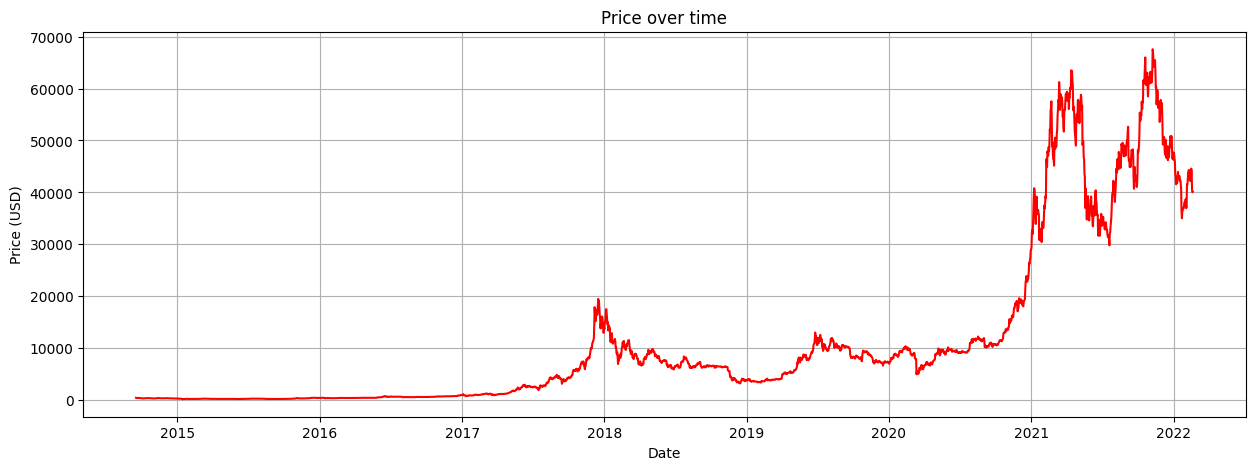

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], color='red')
plt.title('Price over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.grid(True)

plt.show()

In [11]:
#X = df.set_index("Date", inplace = True) # Date is already set as index in a previous cell
X = df.drop('Adj Close', axis=1) # Select all columns except 'Open' for X
y = df['Open']

#Drop adj close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # takes 3/10 of the data for testing
print(X_train)
print(X_test)

                    Open          High           Low         Close  \
Date                                                                 
2017-09-23   3629.919922   3819.209961   3594.580078   3792.399902   
2015-06-25    240.365005    243.332001    240.365005    242.798996   
2021-03-22  57517.890625  58471.480469  54288.156250  54529.144531   
2017-09-20   3916.360107   4031.389893   3857.729980   3905.949951   
2020-06-24   9632.149414   9680.367188   9278.233398   9313.610352   
...                  ...           ...           ...           ...   
2019-03-13   3913.047363   3926.597656   3891.904297   3906.717285   
2017-09-16   3637.750000   3808.840088   3487.790039   3625.040039   
2017-10-21   5996.790039   6194.879883   5965.069824   6031.600098   
2018-04-03   7102.259766   7530.939941   7072.490234   7456.109863   
2017-01-24    910.677002    924.145020    892.286011    892.687012   

                 Volume  
Date                     
2017-09-23    928113984  
2015-06-25 

/tmp/ipython-input-2379516975.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col])
/tmp/ipython-input-2379516975.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col])
/tmp/ipython-input-2379516975.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

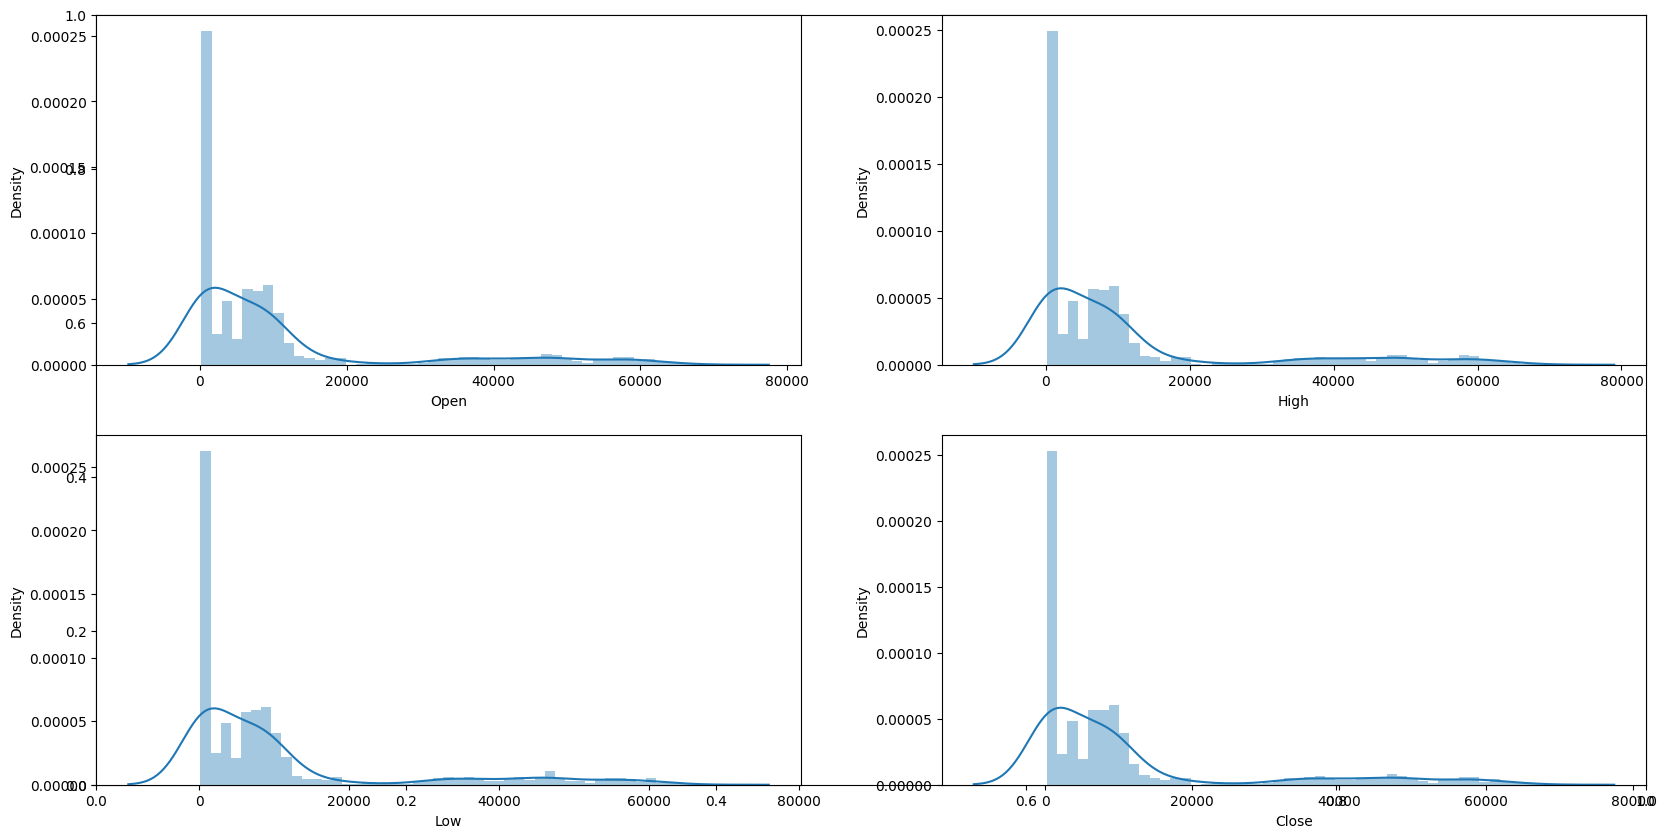

In [12]:
import seaborn as sn
features = ['Open','High','Low','Close']

plt.subplots(figsize= (20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.distplot(df[col])
plt.show()

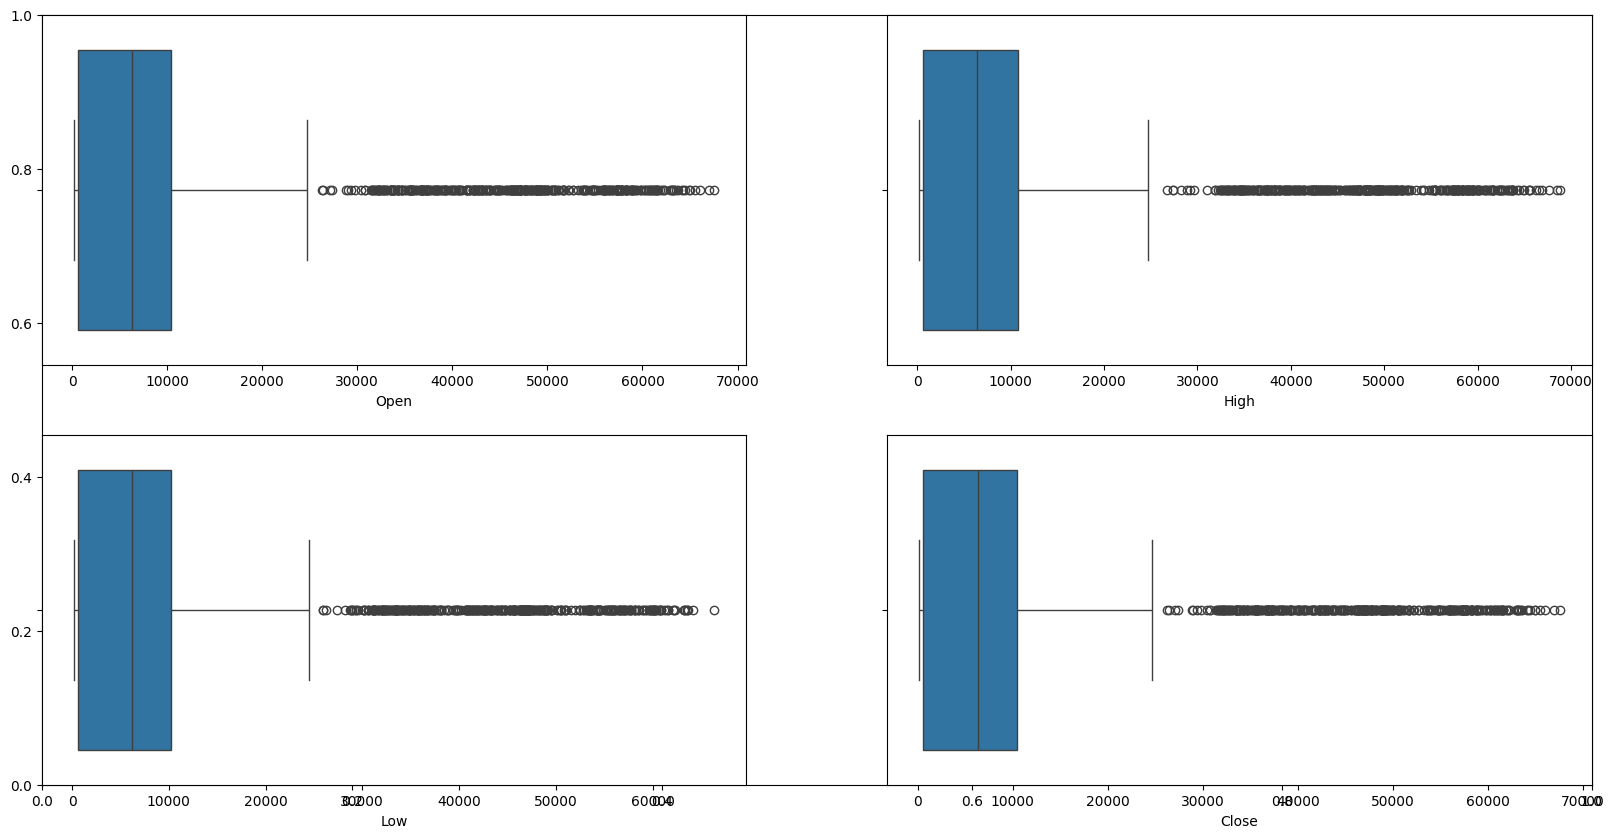

In [13]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.boxplot(df[col], orient='h')
plt.show()

In [14]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day    # date collumn already set as index so the previous code did not work

df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21


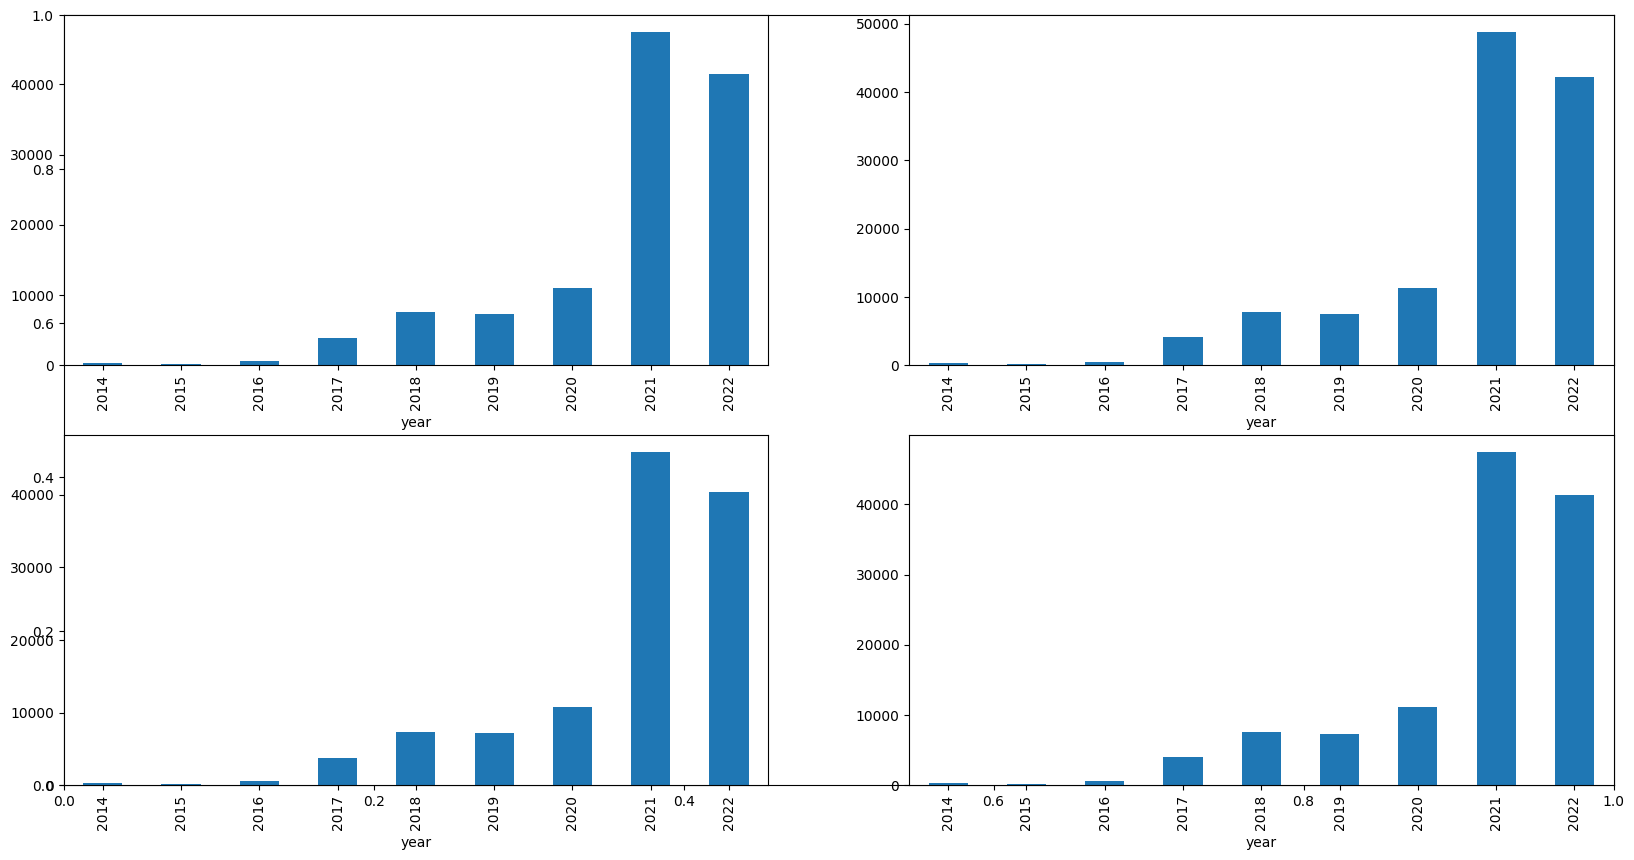

In [15]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1


In [17]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

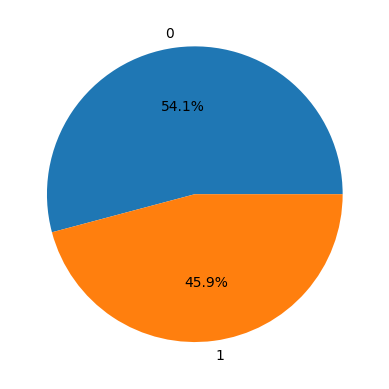

In [18]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

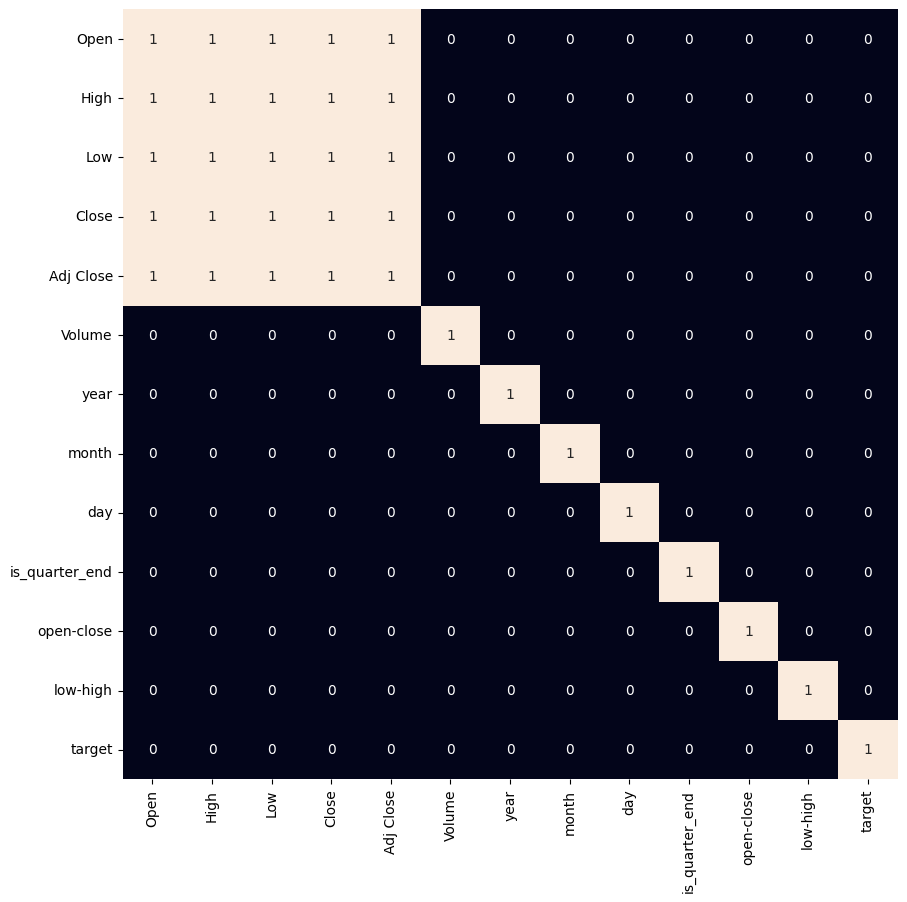

In [19]:
plt.figure(figsize=(10, 10))
sn.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.3, random_state=42) #70% train data



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5319642853158836
Validation Accuracy :  0.5117827868852459

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5341406767673837
Validation Accuracy :  0.5287556108508977

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

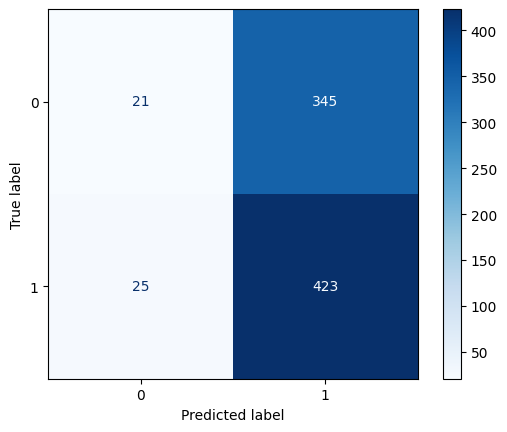

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid, cmap='Blues')
plt.show()


In [25]:
sample_input = np.array([[-5, -10, 0]])

scaled_input = scaler.transform(sample_input)


prediction = models[2].predict(scaled_input) # models[2] is XGBClassifier

if prediction[0] == 1:
  print("The stock price is predicted to go up.")
else:
  print("The stock price is predicted to go down.")

The stock price is predicted to go down.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
